#To Predict the price of used car by looking at its Year,	Present_Price,	Kms_Driven,	Fuel_Type,	Seller_Type,	Transmission and	Owner.
I have used the car price dataset from kaggle, and trained the model using **Linear Regression** and **Random Forest Regression**, then picked the most suitable model.

Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Impoting Dataset


In [3]:
data_set = pd.read_csv("/content/car data.csv")

print("Showing first five rows of our dataset:")
data_set.head()

Showing first five rows of our dataset:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print("No. of rows and columns in our dataset: ")
data_set.shape

No. of rows and columns in our dataset: 


(301, 9)

In [5]:
#checking no. of missing values
data_set.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Great ! we have no missing values, so, no need of imputation. 

In [6]:
#getting some more information about the dataset
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Renaming Categorical Data

In [7]:
# We have 3 columns of categorical data: Fuel_Type, Seller_Type, Transmission
# as numeric values are easier for machine to precess, we put the categorical information in form of numeric values.
# first, let's see what are different labels/categories for each of these columns.

# for Fuel_Type
print(data_set.Fuel_Type.value_counts())

# for Seller_Type
print(data_set.Seller_Type.value_counts())

# for Transmission: 
print(data_set.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
# Encoding/Renaming
data_set.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data_set.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data_set.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
#Displaying changed values
data_set.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Extracting Independent and dependent Variable  

In [10]:
# we don't need car name in deciding prices and, Selling_price is our dependent variable
x=data_set.drop(['Car_Name', 'Selling_Price'], axis=1) #axis is 1 while removing column and 0 while removing row
y=data_set['Selling_Price']

In [11]:
print(x)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [12]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the dataset into training and test set.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

**Training Model**

1. Linear Regression:

In [14]:
from sklearn.linear_model import LinearRegression  
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [17]:
#Prediction of Test and Training set result  
training_data_pred = lin_reg_model.predict(x_train) 
test_data_pred = lin_reg_model.predict(x_test)  

Checking the goodness fit of our model:

In [18]:
from sklearn import metrics
value = metrics.r2_score(y_train, training_data_pred)
print("Goodness fit for training data: ",value)

Goodness fit for training data:  0.8787289819887416


In [19]:
value2 = metrics.r2_score(y_test, test_data_pred)
print("Goodness fit for test data: ",value2)

Goodness fit for test data:  0.8735518306725629


Visualisation

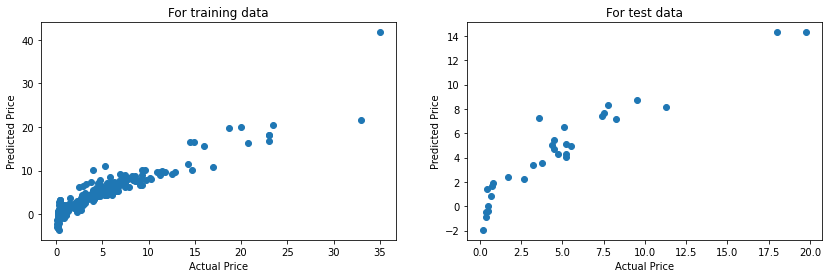

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(y_train, training_data_pred)  
plt.title("For training data")  
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")  
  
plt.subplot(1,2,2)
plt.scatter(y_test, test_data_pred) 
plt.title("For test data")   
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")  
plt.show()  




2. Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(x_train, y_train)  


RandomForestRegressor()

In [22]:
#Prediction of Test and Training set result  
training_data_pred = rand_forest_model.predict(x_train) 
test_data_pred = rand_forest_model.predict(x_test)  

Checking goodness fit:

In [23]:
value1 = metrics.r2_score(y_train, training_data_pred)
print("Goodness fit for training data: ",value1)

Goodness fit for training data:  0.9880658234239058


In [24]:
value2 = metrics.r2_score(y_test, test_data_pred)
print("Goodness fit for test data: ",value2)

Goodness fit for test data:  0.9429701310441964


Visualisation

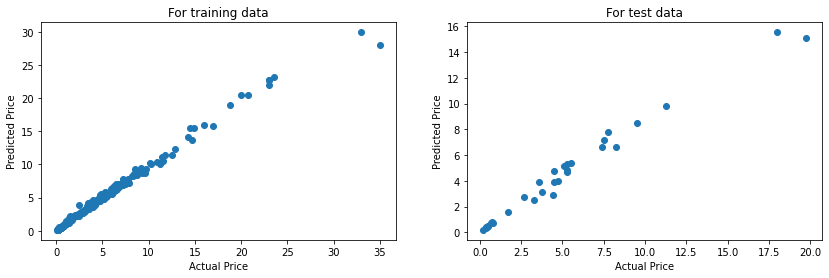

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(y_train, training_data_pred)  
plt.title("For training data")  
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")  
  
plt.subplot(1,2,2)
plt.scatter(y_test, test_data_pred) 
plt.title("For test data")   
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")  
plt.show()  




So, we got better performance by the Random Forest model.


Saving the model:

In [26]:
# pickling the model
import pickle
pickle_out = open("rand_forest_model.pkl", "wb")
pickle.dump(rand_forest_model, pickle_out)
pickle_out.close()